In [1]:
import librosa 
import soundfile
import os,glob,pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))

    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))

    return result


In [3]:
##Emotion in the RAVDESS dataset
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised',
}
observed_emotions  = ['calm','happy','fearful','disgust']

In [4]:
for file in glob.glob("C:\\Users\\adhik\\Downloads\\data_audio\\Actor_*[0-9]*/*"):
    file_name = os.path.basename(file)
    print(file_name)

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav
03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav
03-01-02-01-01-01-01.wav
03-01-02-01-01-02-01.wav
03-01-02-01-02-01-01.wav
03-01-02-01-02-02-01.wav
03-01-02-02-01-01-01.wav
03-01-02-02-01-02-01.wav
03-01-02-02-02-01-01.wav
03-01-02-02-02-02-01.wav
03-01-03-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-01-02-02-01.wav
03-01-03-02-01-01-01.wav
03-01-03-02-01-02-01.wav
03-01-03-02-02-01-01.wav
03-01-03-02-02-02-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-01-02-01.wav
03-01-04-01-02-01-01.wav
03-01-04-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-04-02-01-02-01.wav
03-01-04-02-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-05-01-01-01-01.wav
03-01-05-01-01-02-01.wav
03-01-05-01-02-01-01.wav
03-01-05-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-05-02-01-02-01.wav
03-01-05-02-02-01-01.wav
03-01-05-02-02-02-01.wav
03-01-06-01-01-01-01.wav
03-01-06-01-01-02-01.wav
03-01-06-01-02-01-01.wav
03-01-06-01-02-02-01.wav


In [5]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\adhik\\Downloads\\data_audio\\Actor_*[0-9]*/*"): ##wild card bitches
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x),y,test_size=test_size,random_state=9)    

In [6]:
##spliting dataset bruh
x_train,x_test,y_train,y_test = load_data(test_size=0.25)

In [14]:
print(f'Feature extracted: {x_train.shape[1]}')

Feature extracted: 180


In [16]:
##initialization of the MLP(Multi layer perceptron model)
model = MLPClassifier(alpha=0.01,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(300,),learning_rate='adaptive',max_iter=500)

In [17]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [18]:
model.score(x_train,y_train)

0.7951388888888888

In [25]:
##predict for test set
y_pred = model.predict(x_test)
##calculate the accuracy  
accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)
#print accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 66.67%


In [26]:
print(y_pred[:10])

['happy' 'calm' 'happy' 'happy' 'disgust' 'calm' 'disgust' 'happy'
 'disgust' 'happy']


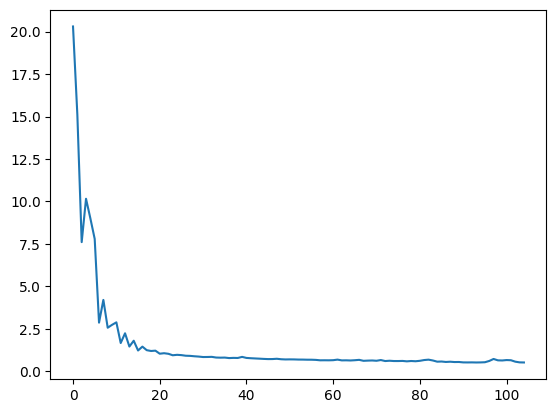

In [28]:
##plotting the MLP classifier graph
loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [29]:
##redo 
model1 = MLPClassifier(alpha=0.001,batch_size=256,epsilon=1e-08,hidden_layer_sizes=(200,200,100,50),learning_rate='adaptive',max_iter=500)
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.8038194444444444

In [30]:
#predict the new 
y_pred1 = model1.predict(x_test)
#calculate new accuracy
accuracy1 = accuracy_score(y_true=y_test,y_pred=y_pred1)
#print accuracy
print("Accuracy :{:.2f}%".format(accuracy1*100))

Accuracy :67.19%


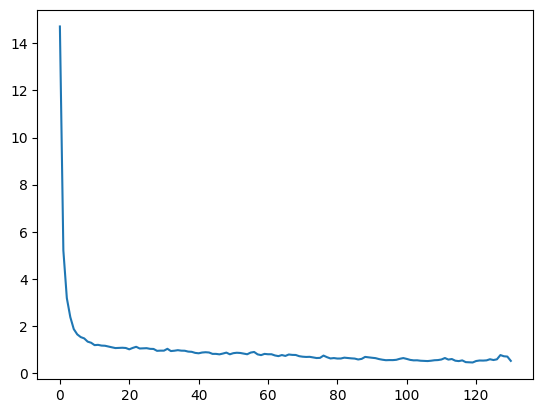

In [31]:
##plotting the new MLP
loss_value1 = model1.loss_curve_
plt.plot(loss_value1)
plt.show()

In [34]:
## saving the model tokenizer
import pickle
pickle.dump(model1,open("C:\\Users\\adhik\\Downloads\\saved_audio+model\\emotion_classification-model.pkl",'wb'))